In [ ]:
%matplotlib inline

In [70]:

# A demo of K-Means clustering on the handwritten digits data


In this example we compare the various initialization strategies for
K-means in terms of runtime and quality of the results.

As the ground truth is known here, we also apply different cluster
quality metrics to judge the goodness of fit of the cluster labels to the
ground truth.

Cluster quality metrics evaluated (see `clustering_evaluation` for
definitions and discussions of the metrics):

=========== ========================================================
Shorthand    full name
=========== ========================================================
homo         homogeneity score
compl        completeness score
v-meas       V measure
ARI          adjusted Rand index
AMI          adjusted mutual information
silhouette   silhouette coefficient
=========== ========================================================




SyntaxError: invalid syntax (<ipython-input-70-cac284100a90>, line 4)

In [68]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
np.random.seed(42)
digits = load_digits()
data = scale(digits.data)

In [69]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [5]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [9]:
n_samples, n_features = data.shape

In [10]:
n_samples

1797

In [11]:
n_features

64

In [12]:
data.shape

(1797, 64)

In [13]:
n_digits = len(np.unique(digits.target))

In [14]:
n_digits

10

In [15]:
labels = digits.target

In [16]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
sample_size = 300

In [18]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [19]:
print(82 * '_')

__________________________________________________________________________________


In [20]:
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


In [21]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)

In [ ]:
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [22]:
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

k-means++	0.27s	69432	0.602	0.650	0.625	0.465	0.621	0.146


In [23]:
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

random   	0.20s	69694	0.669	0.710	0.689	0.553	0.686	0.147


In [24]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

PCA-based	0.03s	70804	0.671	0.698	0.684	0.561	0.681	0.118


In [25]:
print(82 * '_')

__________________________________________________________________________________


In [27]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)

In [28]:
reduced_data

array([[ 1.91421057, -0.95443226],
       [ 0.58896964,  0.92468431],
       [ 1.30200892, -0.31719127],
       ...,
       [ 1.02258833, -0.1480197 ],
       [ 1.07604289, -0.38080942],
       [-1.25768806, -2.22778038]])

In [29]:
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

In [30]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

In [33]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

In [34]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [35]:
xx

array([[-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
        10.94278482, 10.96278482],
       [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
        10.94278482, 10.96278482],
       [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
        10.94278482, 10.96278482],
       ...,
       [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
        10.94278482, 10.96278482],
       [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
        10.94278482, 10.96278482],
       [-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
        10.94278482, 10.96278482]])

In [36]:
yy

array([[-7.6750714, -7.6750714, -7.6750714, ..., -7.6750714, -7.6750714,
        -7.6750714],
       [-7.6550714, -7.6550714, -7.6550714, ..., -7.6550714, -7.6550714,
        -7.6550714],
       [-7.6350714, -7.6350714, -7.6350714, ..., -7.6350714, -7.6350714,
        -7.6350714],
       ...,
       [10.8049286, 10.8049286, 10.8049286, ..., 10.8049286, 10.8049286,
        10.8049286],
       [10.8249286, 10.8249286, 10.8249286, ..., 10.8249286, 10.8249286,
        10.8249286],
       [10.8449286, 10.8449286, 10.8449286, ..., 10.8449286, 10.8449286,
        10.8449286]])

In [37]:
x_min

-7.997215181404679

In [38]:
x_max

10.982508320404243

In [39]:
y_min

-7.675071399459898

In [40]:
y_max

10.860944380991803

In [43]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [44]:
xx.ravel()

array([-7.99721518, -7.97721518, -7.95721518, ..., 10.92278482,
       10.94278482, 10.96278482])

In [45]:
yy.ravel()

array([-7.6750714, -7.6750714, -7.6750714, ..., 10.8449286, 10.8449286,
       10.8449286])

In [47]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [48]:
Z = Z.reshape(xx.shape)

In [50]:
xx.shape

(927, 949)

In [51]:
Z

array([[4, 4, 4, ..., 9, 9, 9],
       [4, 4, 4, ..., 9, 9, 9],
       [4, 4, 4, ..., 9, 9, 9],
       ...,
       [5, 5, 5, ..., 8, 8, 8],
       [5, 5, 5, ..., 8, 8, 8],
       [5, 5, 5, ..., 8, 8, 8]])

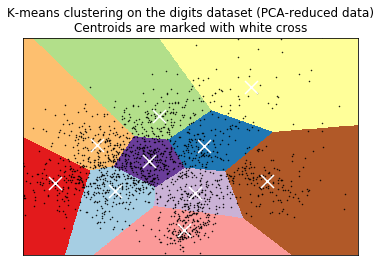

In [67]:
# Put the result into a color plot

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=1)
# Plot the centroids as a white X

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=169, linewidths=3,color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min+2, x_max-2)
plt.ylim(y_min+2, y_max-2)
plt.xticks(())
plt.yticks(())
plt.show()